In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df =  pd.read_csv('Electricity+Consumption.csv')

In [3]:
df

,DATE,Humidity,Temperature,Electricity
0,2020-01-01 00:00:00 EST,92,-1.1,914
1,2020-01-01 01:00:00 EST,92,-1.5,887
2,2020-01-01 02:00:00 EST,91,-1.5,865
3,2020-01-01 03:00:00 EST,88,-1.1,852
4,2020-01-01 04:00:00 EST,87,-1.3,852
...,...,...,...,...
8755,2020-12-30 19:00:00 EST,95,-1.2,1180
8756,2020-12-30 20:00:00 EST,93,0.8,1133
8757,2020-12-30 21:00:00 EST,94,1.9,1073
8758,2020-12-30 22:00:00 EST,93,2.2,994


In [5]:
df.dropna(inplace = True)

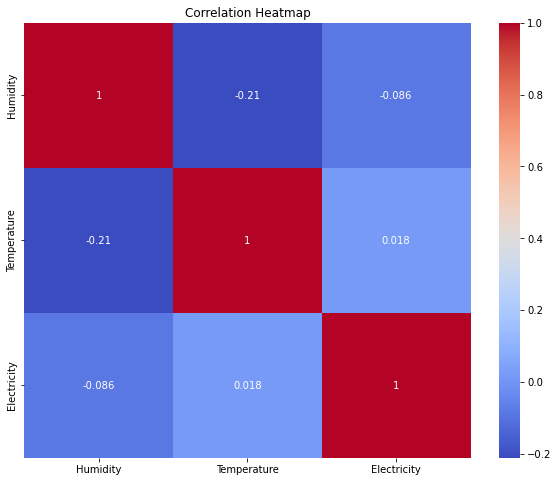

In [8]:
# Select only the numeric columns for correlation matrix
import seaborn as sn
numeric_df = df.select_dtypes(include=[np.number])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sn.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [10]:
#this will help the model to understand the time series data
training_set = df.iloc[:8712,1:4].values

In [11]:
test_set = df.iloc[8712:,1:4].values

In [14]:

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))


In [15]:
training_set_scaled = sc.fit_transform(training_set)
test_set_scaled = sc.fit_transform(test_set)


In [17]:
#last preprocessing all the columns 
#here i dont need the target variable , only i need is independent varibles
test_set_scaled = test_set_scaled[:,0:2]

In [18]:
#work accroding to single variate 
X_train = []
y_train = []
WS = 24
for i in range(WS,len(training_set_scaled)):
    X_train.append(training_set_scaled[i-WS:i, 0:3])
    y_train.append(training_set_scaled[i,2])
    

In [19]:
X_train,y_train = np.array(X_train), np.array(y_train)

In [20]:
X_train

array([[[0.91011236, 0.4       , 0.27878788],
        [0.91011236, 0.3936    , 0.25541126],
        [0.8988764 , 0.3936    , 0.23636364],
        ...,
        [0.88764045, 0.408     , 0.39047619],
        [0.82022472, 0.4048    , 0.34372294],
        [0.80898876, 0.4016    , 0.28831169]],

       [[0.91011236, 0.3936    , 0.25541126],
        [0.8988764 , 0.3936    , 0.23636364],
        [0.86516854, 0.4       , 0.22510823],
        ...,
        [0.82022472, 0.4048    , 0.34372294],
        [0.80898876, 0.4016    , 0.28831169],
        [0.76404494, 0.3952    , 0.24848485]],

       [[0.8988764 , 0.3936    , 0.23636364],
        [0.86516854, 0.4       , 0.22510823],
        [0.85393258, 0.3968    , 0.22510823],
        ...,
        [0.80898876, 0.4016    , 0.28831169],
        [0.76404494, 0.3952    , 0.24848485],
        [0.79775281, 0.3856    , 0.22510823]],

       ...,

       [[0.71910112, 0.3408    , 0.41125541],
        [0.74157303, 0.3472    , 0.35930736],
        [0.75280899, 0

In [21]:
#reshape 
X_train = np.reshape(X_train,(X_train.shape[0], X_train.shape[1],3))

In [ ]:
#now X_train shape is done to give the input to the LSTM model


In [22]:
#importing the keras and other  libraries 
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout

2024-06-23 14:57:36.117480: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-23 14:57:36.164886: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 AVX512_FP16 AVX_VNNI AMX_TILE AMX_INT8 AMX_BF16 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-23 14:57:37.158120: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [23]:
Model = Sequential()

In [26]:

Model = Sequential()

Model.add(LSTM(units = 70, return_sequences = True, input_shape = (X_train.shape[1], 3)))
Model.add(Dropout(0.2))

Model.add(LSTM(units = 70, return_sequences = True))
Model.add(Dropout(0.2))

Model.add(LSTM(units = 70, return_sequences = True))
Model.add(Dropout(0.2))

Model.add(LSTM(units = 70))
Model.add(Dropout(0.2))

Model.add(Dense(units = 1))

Model.compile(optimizer = 'adam', loss = 'mean_squared_error')

Model.fit(X_train,y_train, epochs = 80, batch_size = 32)

Epoch 1/80


2024-06-23 15:07:42.102081: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8900


272/272 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 0.0225
Epoch 2/80
272/272 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0062
Epoch 3/80
272/272 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0056
Epoch 4/80
272/272 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0053
Epoch 5/80
272/272 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0046
Epoch 6/80
272/272 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0041
Epoch 7/80
272/272 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0035
Epoch 8/80
272/272 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0028
Epoch 9/80
272/272 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0022
Epoch 10/80
272/272 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0018
Epoch 11/80
272/272 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0016
Epoch 12/80
272/272 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0016
Epoch 13/80
272/272 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0013
Epoch 14/80
272/272 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0013
Epoch 15/80
272/272 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0012

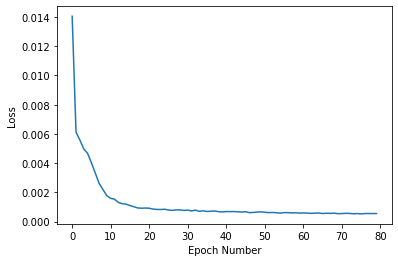

In [27]:
plt.plot(range(len(Model.history.history['loss'])), Model.history.history['loss'])
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━

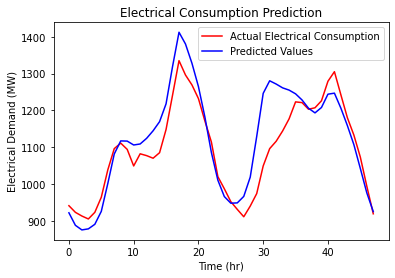

In [28]:
prediction_test = []

Batch_one = training_set_scaled[-24:]
Batch_New = Batch_one.reshape((1,24,3))

for i in range(48):
    
    First_pred = Model.predict(Batch_New)[0]
    
    prediction_test.append(First_pred)
    
    New_var = test_set_scaled[i,:]
    
    New_var = New_var.reshape(1,2)
    
    New_test = np.insert(New_var, 2, [First_pred], axis =1)
    
    New_test = New_test.reshape(1,1,3)
    
    Batch_New = np.append(Batch_New[:,1:,:], New_test, axis=1)
    
prediction_test = np.array(prediction_test)

SI = MinMaxScaler(feature_range = (0,1))
y_Scale = training_set[:,2:3]
SI.fit_transform(y_Scale)

predictions = SI.inverse_transform(prediction_test)

real_values = test_set[:, 2]

plt.plot(real_values, color = 'red', label = 'Actual Electrical Consumption')
plt.plot(predictions, color = 'blue', label = 'Predicted Values')
plt.title('Electrical Consumption Prediction')
plt.xlabel('Time (hr)')
plt.ylabel('Electrical Demand (MW)')
plt.legend()
plt.show()


In [29]:
import math
from sklearn.metrics import mean_squared_error
RMSE = math.sqrt(mean_squared_error(real_values,predictions))


def mean_absolute_percentage_error (y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred)/y_true)) * 100

MAPE = mean_absolute_percentage_error(real_values,predictions)